Done. You have the matrices PP QQ  RR  SS  WW.
  
Done. You have the matrices "Response" and "Response_named" 
which contain the models simulated reponses to
given values for the exogenous stochastic processes.
  
  
Here are the UNFILTERED SIMULATED series.
Total Simulation Length =  500
Number of Initial Values Discarded =  100
  
Trend and cycle components have been computed.
The matrices Mat_trend, Mat_trend_named,
Mat_cycle, Mat_cycle_named can be downloaded
to excel or used to make plots.
  
Detrending Filter Used:  Hodrick-Prescott
  
  
Simulated Series, Trend Component, Cyclical Comoponent
x-axis: time periods,  y-axis:  %-deviation from steady state
  


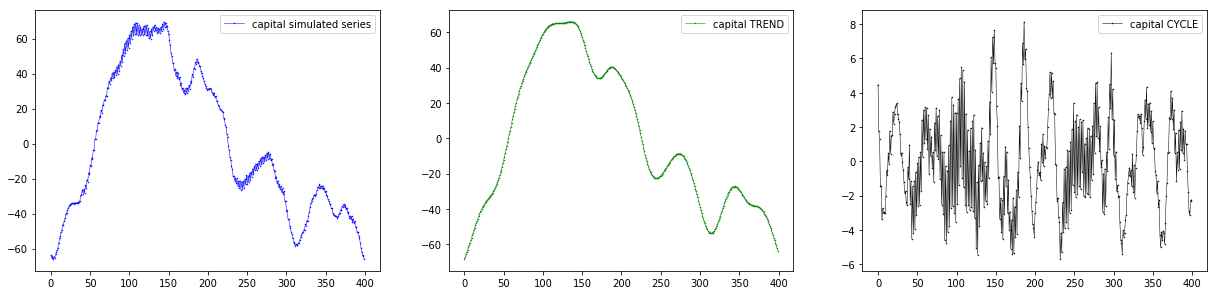

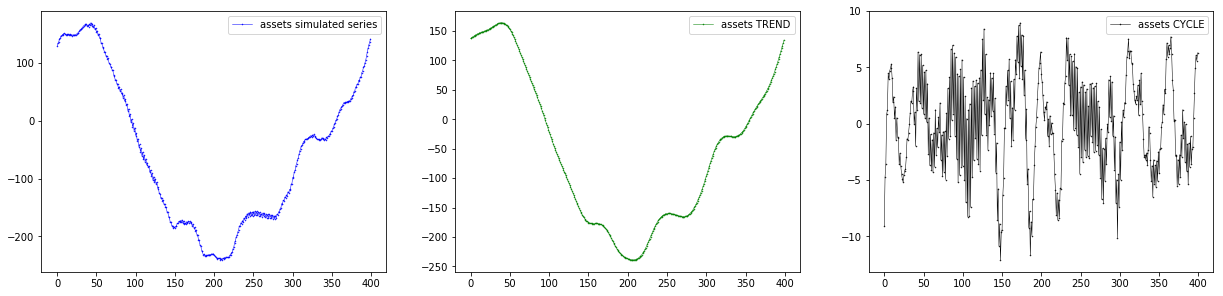

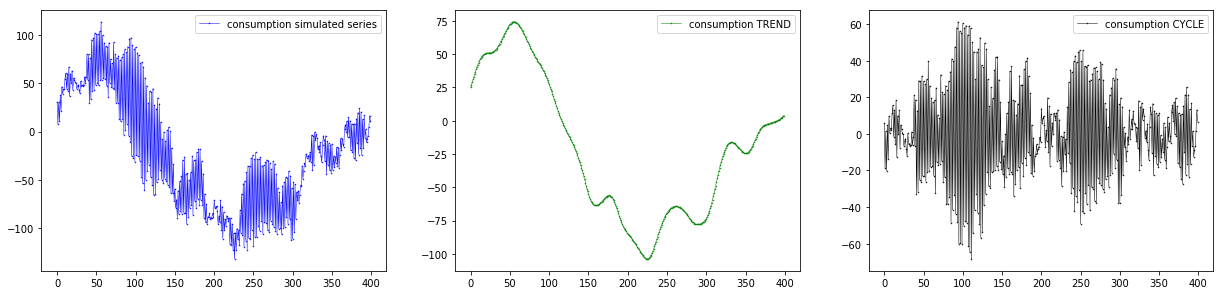

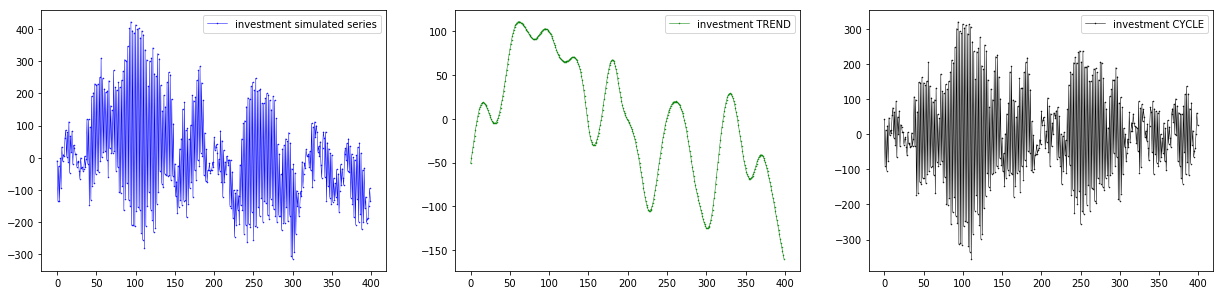

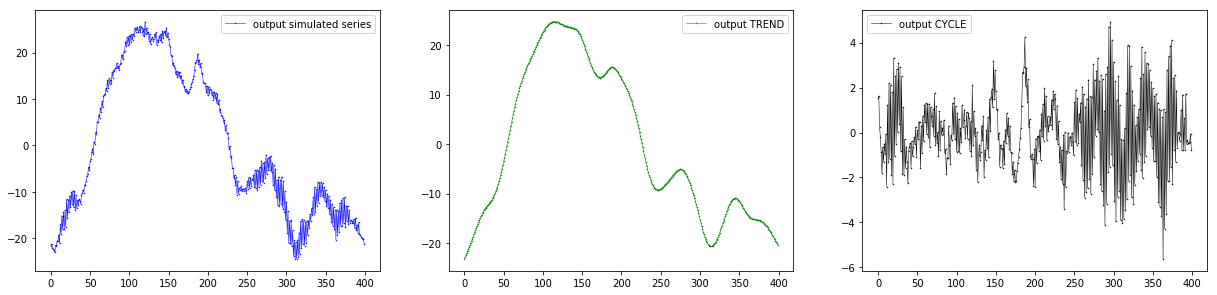

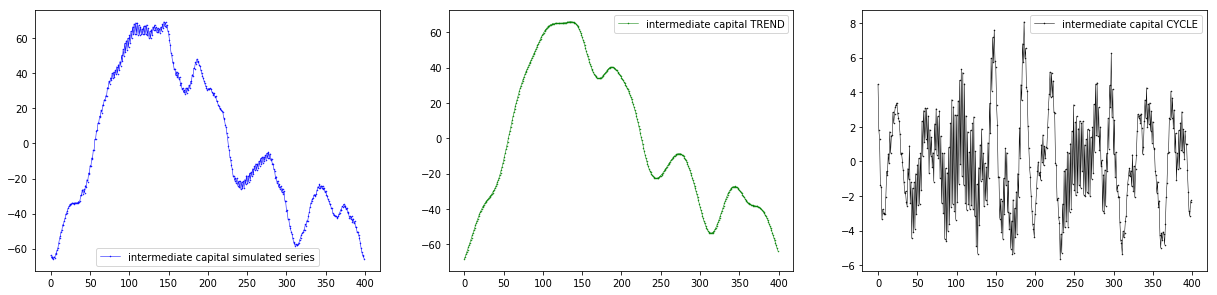

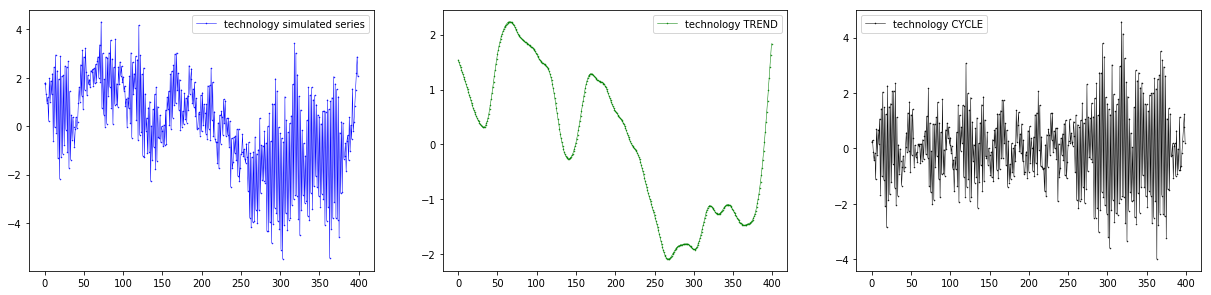

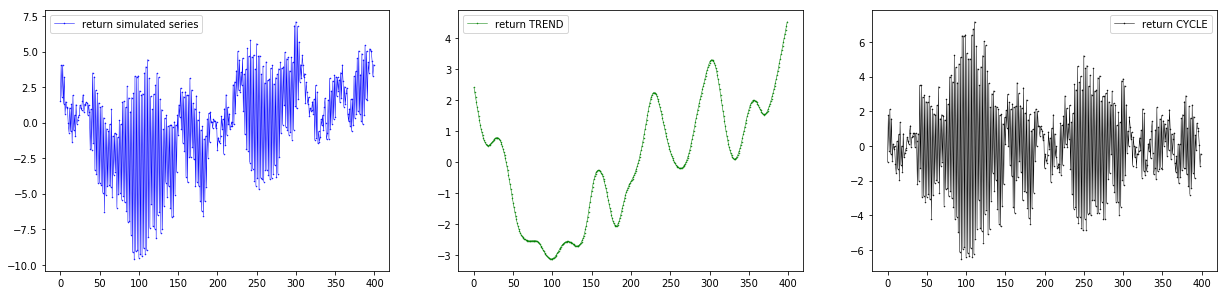

  
  
Shocks used in simulation
  


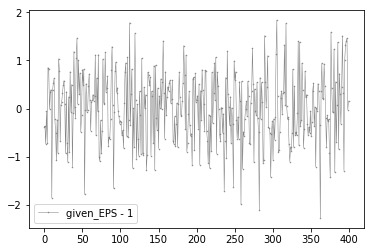

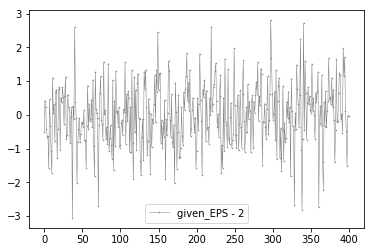

   
   
  
  
  
Here are the moments for the simulated series:
  
  
 
Table 01:  Mean, Standard Deviation, Coefficient of Variation
 


,Mean,Std Deviation,Coeff of Variation
capital,-3.65e-14,2.77e+00,-7.59e+13
assets,1.50e-12,4.23e+00,2.82e+12
consumption,6.85e-13,2.65e+01,3.86e+13
investment,4.08e-13,1.38e+02,3.38e+14
output,-1.86e-13,1.73e+00,-9.28e+12
intermediate capital,-9.77e-16,2.74e+00,-2.80e+15
technology,2.51e-14,1.47e+00,5.85e+13
return,-4.10e-15,2.81e+00,-6.84e+14


 
 
 
Table 02:  Cross Correlation with Output, Standard Deviation Relative to Output
 


,Correlation with GDP,Std Dev Relative to GDP
capital,3.39e-01,1.60e+00
assets,-3.37e-01,2.45e+00
consumption,-2.02e-01,1.53e+01
investment,-1.81e-01,7.98e+01
output,1.00e+00,1.00e+00
intermediate capital,3.48e-01,1.58e+00
technology,8.16e-01,8.51e-01
return,1.86e-01,1.63e+00


 
 
  
Table 03:  Autocorrelations  t + Leads  t=0  t - Lags  (Not Cross Autocorrelations)
 


,capital,assets,consumption,investment,output,intermediate capital,technology,return
5,4.88e-01,5.11e-01,-8.85e-01,-8.91e-01,-3.50e-01,5.23e-01,-7.79e-01,-8.90e-01
4,8.85e-01,8.86e-01,9.45e-01,9.45e-01,8.79e-01,8.84e-01,8.78e-01,9.45e-01
3,3.15e-01,3.34e-01,-8.87e-01,-8.92e-01,-4.01e-01,3.45e-01,-7.72e-01,-8.91e-01
2,6.60e-01,6.57e-01,9.00e-01,9.01e-01,7.32e-01,6.54e-01,7.74e-01,9.01e-01
1,8.21e-02,9.65e-02,-8.73e-01,-8.77e-01,-4.76e-01,1.06e-01,-7.57e-01,-8.77e-01
0,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00
-1,4.88e-01,5.11e-01,-8.85e-01,-8.91e-01,-3.50e-01,5.23e-01,-7.79e-01,-8.90e-01
-2,8.85e-01,8.86e-01,9.45e-01,9.45e-01,8.79e-01,8.84e-01,8.78e-01,9.45e-01
-3,3.15e-01,3.34e-01,-8.87e-01,-8.92e-01,-4.01e-01,3.45e-01,-7.72e-01,-8.91e-01
-4,6.60e-01,6.57e-01,9.00e-01,9.01e-01,7.32e-01,6.54e-01,7.74e-01,9.01e-01


 
 
  
Table 04:  Cross Autocorrelations  t + Leads  t=0  t - Lags
 


,capital,assets,consumption,investment,output,intermediate capital,technology,return
5,5.27e-01,-5.21e-01,2.07e-01,2.16e-01,-3.50e-01,5.28e-01,-6.27e-01,-2.34e-01
4,3.13e-01,-2.84e-01,-1.55e-01,-1.38e-01,8.79e-01,3.20e-01,7.22e-01,1.42e-01
3,4.58e-01,-4.26e-01,2.54e-01,2.58e-01,-4.01e-01,4.57e-01,-6.10e-01,-2.74e-01
2,2.01e-01,-1.51e-01,-1.32e-01,-1.21e-01,7.32e-01,2.07e-01,6.38e-01,1.26e-01
1,3.29e-01,-2.79e-01,2.71e-01,2.69e-01,-4.76e-01,3.26e-01,-6.00e-01,-2.83e-01
0,3.39e-01,-3.37e-01,-2.02e-01,-1.81e-01,1.00e+00,3.48e-01,8.16e-01,1.86e-01
-1,4.73e-01,-4.94e-01,1.31e-01,1.40e-01,-3.50e-01,4.75e-01,-6.41e-01,-1.58e-01
-2,2.55e-01,-2.79e-01,-2.28e-01,-2.09e-01,8.79e-01,2.63e-01,7.11e-01,2.13e-01
-3,3.49e-01,-3.93e-01,9.19e-02,9.90e-02,-4.01e-01,3.51e-01,-6.43e-01,-1.15e-01
-4,1.16e-01,-1.60e-01,-2.41e-01,-2.25e-01,7.32e-01,1.23e-01,6.23e-01,2.31e-01


In [2]:
#  Uhlig's Exampl6.m
#  A Small Open Economy Stochastic Neoclassical 
#  Growth Model with Adjustment Costs for Capital

import numpy as np

Z_bar = 1
NPV_frac = 0.5
rho = 0.36
delta = 0.025
R_bar = 1.01
eta = 1.0
theta = 0.8
psi_z = 0.95
sigma_z = 0.712
psi_r = 0.95
sigma_r = 1.0
corr_z_r = 0

betta = 1.0/R_bar
XK_bar = ((1+delta)**theta - 1)**(1.0/theta)
FK_omt = (1+delta)**(1-theta)
FX_omt = FK_omt/XK_bar**(1-theta)
YK_bar = (R_bar - FK_omt + delta)/(rho*FX_omt)
K_bar = (Z_bar/YK_bar)**(1.0/(1-rho))
Y_bar = Z_bar*K_bar**rho
X_bar = XK_bar*K_bar
F_bar = (1+delta)*K_bar
A_bar = NPV_frac * (Y_bar/(R_bar - 1))
C_bar = Y_bar - X_bar + (R_bar - 1)*A_bar

VARNAMES = ['capital',
                         'assets',
                         'consumption',
                         'investment',
                         'output',
                         'intermediate capital',
                         'technology',
                         'return']

AA = np.vstack(([ 0, -A_bar],
                           [0, 0], 
                           [-1, 0],    
                           [0, 0]))

BB = np.vstack(([0, R_bar*A_bar],
                           [rho, 0],
                           [-delta, 0],       
                           [K_bar**theta, 0]))

CC = np.vstack(([ -C_bar, -X_bar, Y_bar, 0],
                           [0, 0, -1, 0],
                           [0, 0, 0,(1+delta)],
                           [0, X_bar**theta, 0, (-F_bar**theta) ]))


DD = np.vstack(([0,R_bar*A_bar],
                           [1,0],
                           [0,0],          
                           [0,0]))

FF = np.vstack(([0,0], 
                          [0,0]))

GG = np.vstack(([0, 0],
                           [(-((rho/R_bar)*YK_bar*FX_omt + (1-theta)*FK_omt/R_bar) ),0]))

HH = np.vstack(([0,0],
                           [0,0]))

JJ = np.vstack(([-eta, 0, 0, 0],     
                          [-eta,(1-theta)*(FK_omt-delta)/R_bar,(rho/R_bar)*YK_bar*FX_omt,delta*(1-theta)/R_bar]))

KK = np.vstack(([eta, 0, 0, 0],
                           [eta,theta-1,0,1-theta]))

LL = np.vstack(([0,1],
                          [0,0]))

MM = np.vstack(([0,0],
                            [0,0]))

NN = np.vstack(([psi_z, 0],
                           [0, psi_r ]))

Sigma = np.vstack(([sigma_z**2, corr_z_r*sigma_z*sigma_r], 
                                [corr_z_r*sigma_z*sigma_r, sigma_r**2]))

Sigma_EPS = Sigma


%run Uhlig_solver_abreviated.ipynb

#print(' ')
#print('PP')
#print(PP.shape)
#print(PP)
#print(' ')
#print('RR')
#print(RR.shape)
#print(RR)
#print(' ')
#print('QQ')
#print(QQ.shape)
#print(QQ)
#print(' ')
#print('SS')
#print(SS.shape)
#print(SS)
#print(' ')


%run Uhlig_simul_rand.ipynb

%run Detrend_Filters.ipynb

##  USER INPUT:  Remember to set
##  output_index  in the Calc_Moments.ipynb
## This is different for each model

output_index = 4

%run Calc_Moments.ipynb

